In [1]:
import pandas as pd; pd.set_option('display.max_columns', 500)
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier

In [39]:
df = pd.read_csv('train.csv')

# Task 1 - Forward selection Implementation 


In [40]:
def AUCCalculate(df, col, y):
    X = df[col]
    clf = RandomForestClassifier(max_depth=6, random_state=0)
    clf.fit(X, y)
    pred = clf.predict(X)

    fpr, tpr, thresholds = metrics.roc_curve(target, pred, pos_label=2)
    auc_score = metrics.auc(fpr, tpr)
    return auc_score



def ForwardSelection(df, target, N_Featues): 
    selected_features = ['ram']

    for i in range(N_Featues-1): 
        best_res = 0 
        for col in df_tmp.loc[:, ~df_tmp.columns.isin(selected_features)]: 
            tmp_cols = selected_features + [col]
            auc = AUCCalculate(df, tmp_cols, target)
            if auc > best_res: 
                best_res = auc 
                best_col = col 
        selected_features.append(best_col)
    return selected_features

In [41]:
target = df.price_range
df_tmp = df.drop('price_range', axis=1)

features = ForwardSelection(df_tmp, target, 5)

print(features)

['ram', 'px_height', 'blue', 'dual_sim', 'touch_screen']


# Task 2 - logreg on Forward Selection 

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df[features]
y = df['price_range']
price_classes = ['Cheap', 'Moderate', 'Not Cheap!', 'Expensive']

clf = LogisticRegression(random_state=0).fit(X, y)
pred = clf.predict(X)

print(classification_report(y, pred, target_names=price_classes))

              precision    recall  f1-score   support

       Cheap       0.86      0.83      0.85       500
    Moderate       0.63      0.65      0.64       500
  Not Cheap!       0.60      0.52      0.56       500
   Expensive       0.78      0.88      0.83       500

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



C:\Users\soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 3 - PCA on 5 

In [43]:
from matplotlibStyle import *; setPlotly() # Custom File Delete if you want to

(0.6, 1.0)

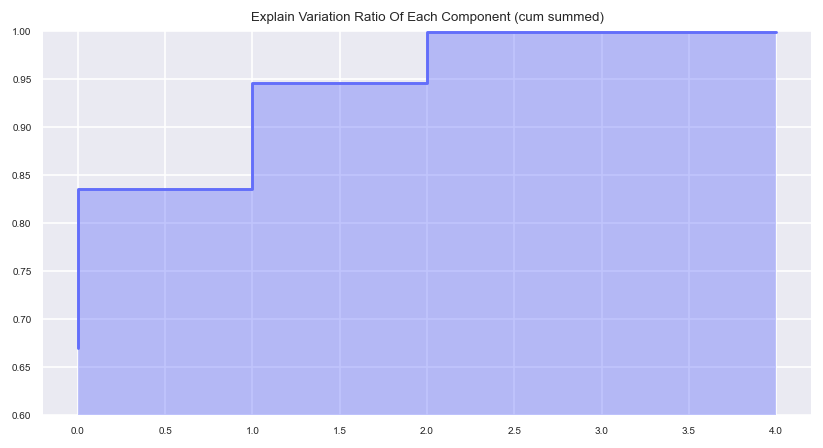

In [44]:
plt.figure(dpi=120)
plt.title('Explain Variation Ratio Of Each Component (cum summed)')

plt.plot(pca.explained_variance_ratio_.cumsum(), drawstyle="steps")
x = np.linspace(0, 4, 5)
plt.fill_between(x, pca.explained_variance_ratio_.cumsum(), step="pre", alpha=0.4)
plt.ylim((0.6, 1))

In [45]:
from sklearn.decomposition import PCA

X = df.drop('price_range', axis=1)

pca = PCA(n_components=5)
df_pca = pca.fit_transform(X)
pd.DataFrame(df_pca, columns=[f'pc{i+1}' for i in range(5)])

,pc1,pc2,pc3,pc4,pc5
0,430.597094,-795.788231,-390.070331,55.636140,-48.449289
1,504.984735,696.622368,-235.629081,343.925977,4.707406
2,473.329828,763.942136,-680.059466,-113.916880,-4.650897
3,639.822324,779.691180,-630.783647,-30.402246,8.627542
4,-718.985184,382.304525,591.040362,-392.357235,-0.346183
...,...,...,...,...,...
1995,-1461.096167,843.813138,-456.014439,62.281534,33.612901
1996,-94.445767,693.937805,708.385209,354.827455,-46.406446
1997,930.669266,436.671452,664.296211,136.527432,32.374260
1998,-1252.737615,-629.884112,285.786392,-190.422713,-4.217939


# Task 4 - Logreg on pca_data

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df_pca
y = df['price_range']
price_classes = ['Cheap', 'Moderate', 'Not Cheap!', 'Expensive']

clf = LogisticRegression(random_state=0).fit(X, y)
pred = clf.predict(X)

print(classification_report(y, pred, target_names=price_classes))

              precision    recall  f1-score   support

       Cheap       0.54      1.00      0.70       500
    Moderate       0.88      0.14      0.24       500
  Not Cheap!       0.99      0.24      0.38       500
   Expensive       0.57      1.00      0.73       500

    accuracy                           0.59      2000
   macro avg       0.75      0.59      0.51      2000
weighted avg       0.75      0.59      0.51      2000



C:\Users\soroush\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Task 5-6 SVM Implementation 

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

pred = clf.predict(X)
print(classification_report(y, pred, target_names=price_classes))

              precision    recall  f1-score   support

       Cheap       0.98      0.99      0.98       500
    Moderate       0.95      0.97      0.96       500
  Not Cheap!       0.96      0.94      0.95       500
   Expensive       0.97      0.97      0.97       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



# Task 7 - svm kernels 

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


for k in ('linear', 'sigmoid'): 
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=k, degree=d))
    clf.fit(X, y)

    pred = clf.predict(X)
    print('-'*30 + f' {k} ' + '-'*30)
    print(classification_report(y, pred, target_names=price_classes))

for d in ([3, 5, 7]): 
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='poly', degree=d))
    clf.fit(X, y)

    pred = clf.predict(X)
    print('-'*30 + f' poly of degree {d} ' + '-'*30)
    print(classification_report(y, pred, target_names=price_classes))

NameError: name 'd' is not defined

# Task 8 - soft hard margins

we can set the C parameter higher numbers to achieve what we call harder margins (eventually some value like 1e10 could be the theoretical hard margin)

In [ ]:
for c in ([0.001, 1, 1000]): 
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto',C=c))
    clf.fit(X, y)
    pred = clf.predict(X)
    print('-'*30 + f' Using C of {c} ' + '-'*30)
    print(classification_report(y, pred, target_names=price_classes))

------------------------------ Using C of 0.001 ------------------------------
              precision    recall  f1-score   support

       Cheap       1.00      0.71      0.83       500
    Moderate       0.66      0.86      0.75       500
  Not Cheap!       0.70      0.84      0.76       500
   Expensive       0.98      0.78      0.87       500

    accuracy                           0.80      2000
   macro avg       0.84      0.80      0.80      2000
weighted avg       0.84      0.80      0.80      2000

------------------------------ Using C of 1 ------------------------------
              precision    recall  f1-score   support

       Cheap       0.98      0.99      0.98       500
    Moderate       0.95      0.97      0.96       500
  Not Cheap!       0.96      0.94      0.95       500
   Expensive       0.97      0.97      0.97       500

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.

# Task 9 - feature eng

- for the binning, the first 40 percent of the battery powers are binned as 1 the rest are equally distanced with a factor of 20 percent each 

In [ ]:
bin_labels = [1, 2, 3, 4]
df['batter_power_binned'] = pd.qcut(df['battery_power'], q=[0, .4, .6, .8, 1], labels=bin_labels)

In [ ]:
df['area_of_screen'] = df.px_height * df.px_width

# BOX-COX Transformation 

aside of log transformation which could come in handy when we are dealing with a feature which contains very large values (and sparse) so the log transformation could smooth the values out and reduce the sparcisity even, we can use a transformation called box-cox transformation, this trnasformation comes in handy when we're using linear models, it also changes the distribution of the feature, making it more Gaussian like as some models could benefit from such transformation 

generally we'd want to use this transformation when we're dealing with non-homoscedastic (heteroskedasticity) data. homoscedasticity means a situation in which the variance of the dependent variable is the same for all the data.

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'box-cox')

df_scaled = df.copy(deep=True)
cols = ['battery_power', 'px_height', 'ram', 'px_width', 'area_of_screen']
for col in cols: 
    posit = df[col].apply(lambda x: 0.1 if x<=0 else x)
    df_scaled[col] = scaler.fit_transform(posit.values.reshape(2000, 1))
df_scaled

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,batter_power_binned,area_of_screen
0,-0.882075,0,2.2,0,1,0,7,0.6,188,2,2,-2.136071,-1.156054,0.444801,9,7,19,0,0,1,1,1,-2.196784
1,-0.443271,1,0.5,1,0,1,53,0.7,136,3,6,0.699365,1.620585,0.513861,17,3,7,1,1,0,2,1,1.121963
2,-1.631419,1,0.5,1,2,1,41,0.9,145,5,6,1.272686,1.062389,0.490345,11,2,9,1,1,0,2,1,1.359041
3,-1.484144,1,2.5,0,0,0,10,0.8,131,6,9,1.202879,1.208206,0.628790,16,8,11,1,0,0,2,1,1.361731
4,1.281396,1,1.2,0,13,1,44,0.6,141,2,14,1.190854,-0.041687,-0.590521,8,2,15,1,1,0,1,4,0.873189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.004605,1,0.5,1,0,1,2,0.8,106,6,14,1.211870,1.422017,-1.396879,13,4,19,1,1,0,0,1,1.442795
1996,1.563359,1,2.6,1,0,0,39,0.2,187,4,3,0.716882,1.574226,-0.005590,11,10,16,1,1,1,2,4,1.121159
1997,1.458414,0,0.9,1,1,1,36,0.7,108,8,3,0.633634,0.885256,0.863809,9,1,5,1,1,0,3,4,0.834636
1998,0.651164,0,0.9,0,4,1,46,0.1,145,5,5,-0.562543,-1.384769,-1.161810,18,10,19,1,1,1,0,3,-0.848518


In [ ]:
X = df_scaled.drop('price_range', axis=1)
y = df_scaled.price_range

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

pred = clf.predict(X)
print(classification_report(y, pred, target_names=price_classes))

              precision    recall  f1-score   support

       Cheap       1.00      0.99      0.99       500
    Moderate       0.97      0.99      0.98       500
  Not Cheap!       0.97      0.98      0.98       500
   Expensive       0.99      0.98      0.99       500

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



# Task 12 Implementing Decision Trees

In [ ]:
from sklearn import tree

X = df.drop('price_range', axis=1)
y = df.price_range

clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y)

pred = clf.predict(X)
print(classification_report(y, pred, target_names=price_classes))

plt.figure(dpi=200)
plt.plot(clf.feature_importances_)
plt.xticks(np.arange(len(X.columns.to_list())), X.columns.to_list())
plt.xticks(rotation=70)

# max_depthint, default=None
# min_samples_splitint or float, default=2 The minimum number of samples required to split an internal node:
# min_samples_leafint or float, default=1 The minimum number of samples required to be at a leaf nod

In [ ]:
from sklearn import tree

X = df.drop('price_range', axis=1)
y = df.price_range

clf = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=20)
clf = clf.fit(X, y)

pred = clf.predict(X)
print(classification_report(y, pred, target_names=price_classes))

plt.figure(dpi=200)
plt.plot(clf.feature_importances_)
plt.xticks(np.arange(len(X.columns.to_list())), X.columns.to_list())
plt.xticks(rotation=70)

# max_depthint, default=None
# min_samples_splitint or float, default=2 The minimum number of samples required to split an internal node:
# min_samples_leafint or float, default=1 The minimum number of samples required to be at a leaf nod